In [144]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

2.16.1


In [145]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [146]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [147]:
x_test.shape

(10000, 28, 28)

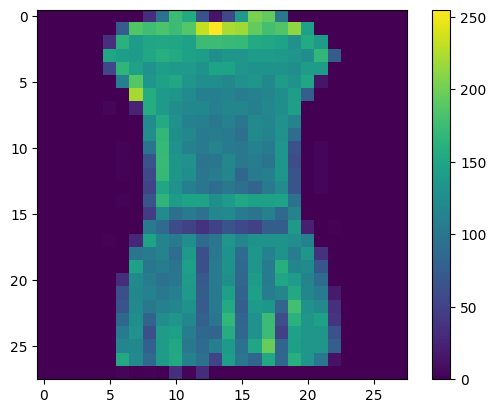

In [148]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [149]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train / 255.0

x_test = x_test / 255.0


In [150]:
x_test.shape

(10000, 28, 28, 1)

In [151]:
x_train.shape

(60000, 28, 28, 1)

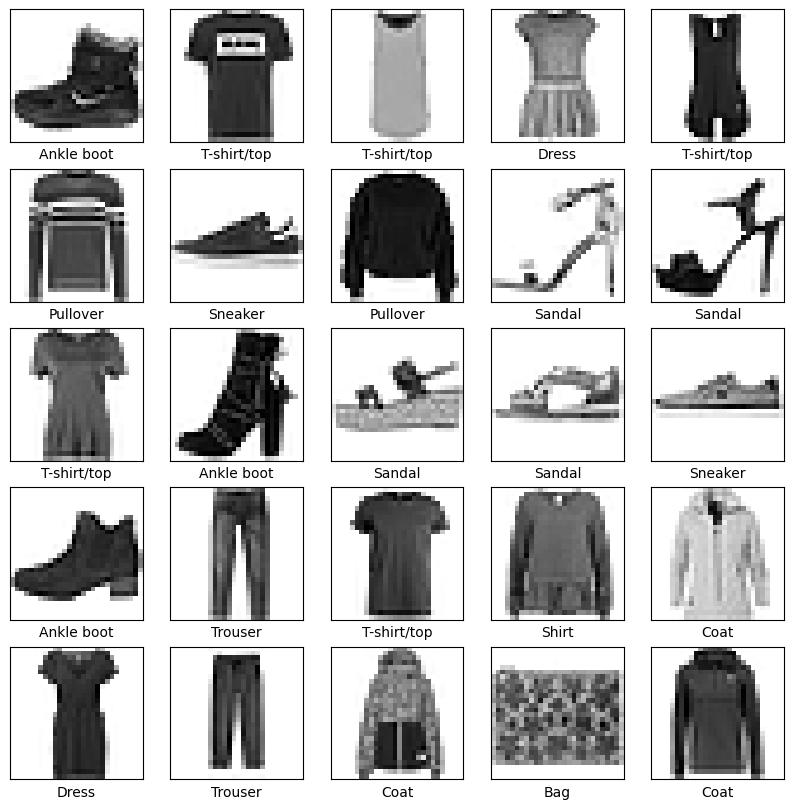

In [152]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [153]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(10)
])

In [154]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [157]:
checkpoint_path = "./ckpt/checkpoint.model.keras"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 verbose=1, save_best_only=True)


In [158]:
model.fit(x_train, y_train, epochs=8, callbacks=[cp_callback], 
          validation_data=(x_test, y_test))

Epoch 1/8
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8449 - loss: 0.4295
Epoch 1: val_loss improved from inf to 0.37694, saving model to ./ckpt/checkpoint.model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8449 - loss: 0.4295 - val_accuracy: 0.8626 - val_loss: 0.3769
Epoch 2/8
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8657 - loss: 0.3645
Epoch 2: val_loss improved from 0.37694 to 0.34725, saving model to ./ckpt/checkpoint.model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8657 - loss: 0.3645 - val_accuracy: 0.8706 - val_loss: 0.3472
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8810 - loss: 0.3224
Epoch 3: val_loss improved from 0.34725 to 0.34361, saving model to ./ckpt/checkpoint.model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8810 - loss: 0.3224 - val_accuracy: 0.8730 - val_loss: 0.3436
Epoch 4/8
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8924 - loss: 0.2914
Ep

In [159]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,424 (1.26 MB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 220,950 (863.09 KB)

In [160]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy is: ", test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8887 - loss: 0.3185

Test Accuracy is:  0.888700008392334


In [161]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
predictions = probability_model.predict(x_test)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([1.2582493e-11, 6.0966325e-13, 1.2578860e-16, 6.6737900e-11,
       4.4185130e-16, 2.2565743e-07, 1.6220581e-12, 9.2197224e-06,
       2.1738982e-11, 9.9999058e-01], dtype=float32)

In [162]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [163]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if(predicted_label == true_label):
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                         100*np.max(predictions_array),
                                        class_names[true_label],
                                         color=color)                                        )

In [164]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

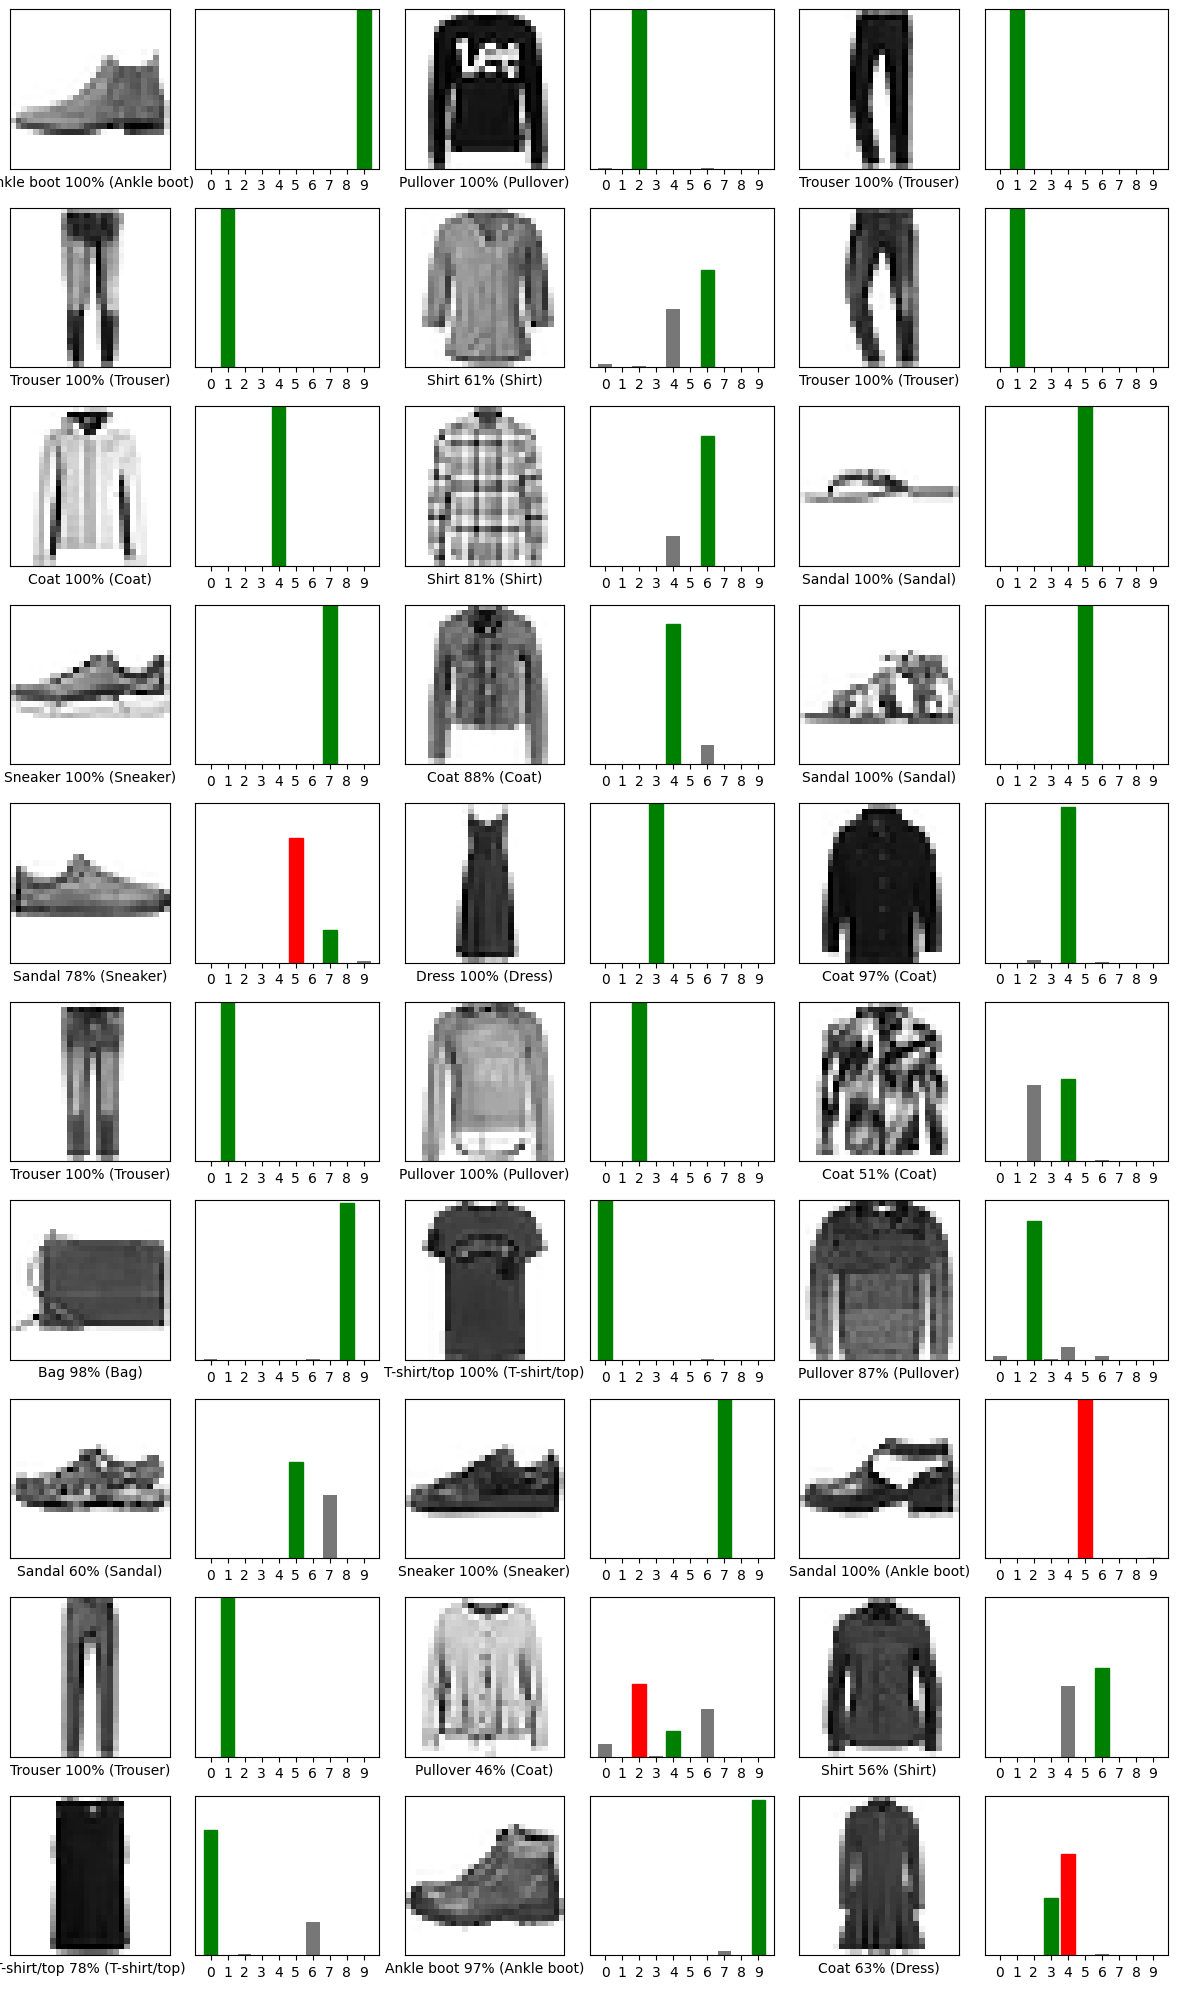

In [165]:
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()